[[8.         8.         8.         0.58039218 0.84705883 1.
  1.        ]
 [8.         8.         0.         0.98431373 0.99215686 1.
  1.        ]
 [8.         0.         8.         0.6156863  0.85882354 1.
  1.        ]
 [8.         0.         0.         0.58039218 0.84705883 1.
  1.        ]
 [0.         8.         8.         0.47058824 0.69411767 0.89411765
  1.        ]
 [0.         8.         0.         0.46666667 0.69411767 0.89411765
  1.        ]
 [0.         0.         8.         0.52156866 0.71764708 0.90196079
  1.        ]
 [0.         0.         0.         0.46666667 0.69411767 0.89411765
  1.        ]
 [0.         4.         0.         0.98823529 0.99607843 1.
  1.        ]
 [4.         8.         0.         0.8509804  0.92941177 1.
  1.        ]
 [8.         8.         4.         0.98039216 0.98823529 1.
  1.        ]
 [0.         0.         4.         0.99607843 1.         1.
  1.        ]
 [8.         0.         4.         0.78431374 0.89411765 1.
  1.        ]
 [0.  

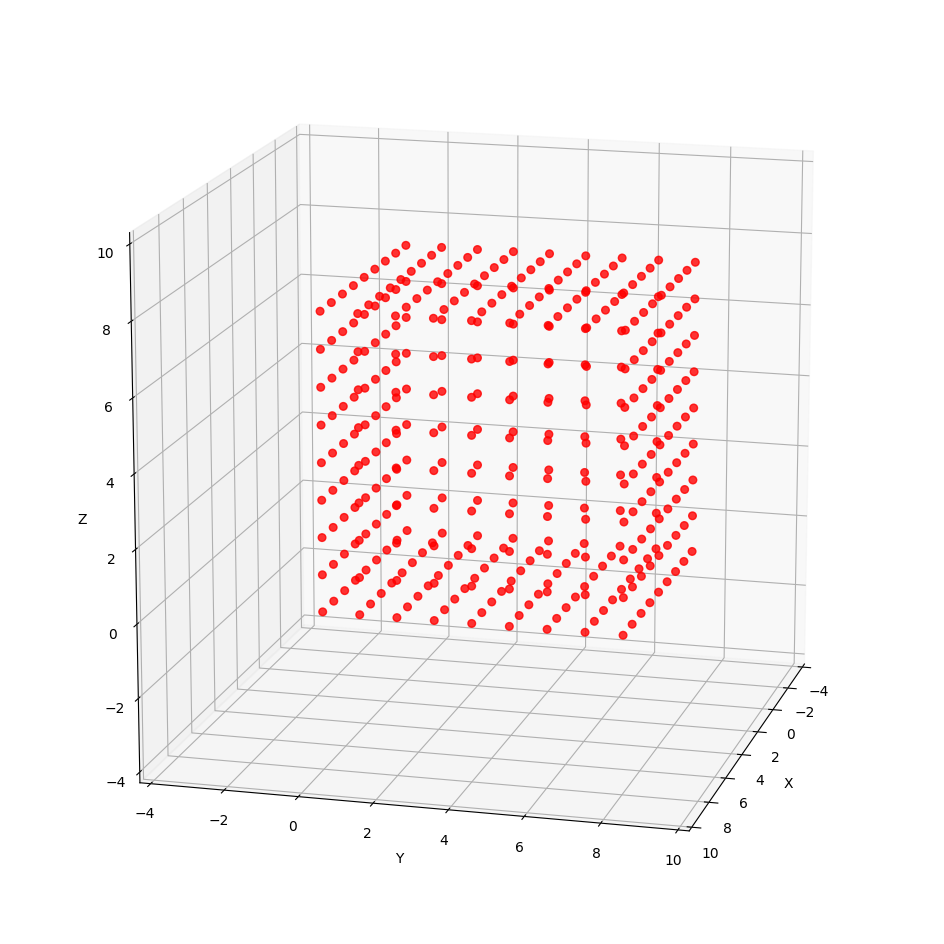

In [21]:
#取得した座標データを表示
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

#これ9*9*9になってるから直す（色確認してから）
b = np.loadtxt('C:\\Users\\ku-admin\\Desktop\\blender-windows64\\output.txt')

print(b)

X1 = b[:,0]
Y1 = b[:,1]
Z1 = b[:,2]

X1 = np.round(X1)
Y1 = np.round(Y1)
Z1 = np.round(Z1)

virtex = np.vstack((X1, Y1))
virtex = np.vstack((virtex, Z1))
virtex = virtex.T
virtex = np.unique(virtex, axis=0)
print(virtex)
print(virtex.shape)

# Figureを追加
fig = plt.figure(figsize = (12, 12))

# 3DAxesを追加
ax = fig.add_subplot(projection='3d')

# Axesのタイトルを設定
ax.set_title("", size = 20)

ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.set_xlim(-4,10)
ax.set_ylim(-4,10)
ax.set_zlim(-4,10)
#ax.scatter(X0, Y0, Z0, s = 0.1, c = "blue", alpha = 0.1)
ax.scatter(virtex[:,0], virtex[:,1], virtex[:,2], s = 30, c = "red", alpha = 0.8)
ax.view_init(elev=15, azim=15)
ax.set_aspect('equal')
ax.axis("on")

plt.show()


#X,Y,Zを再び行列にして、重複要素を削除(unique)

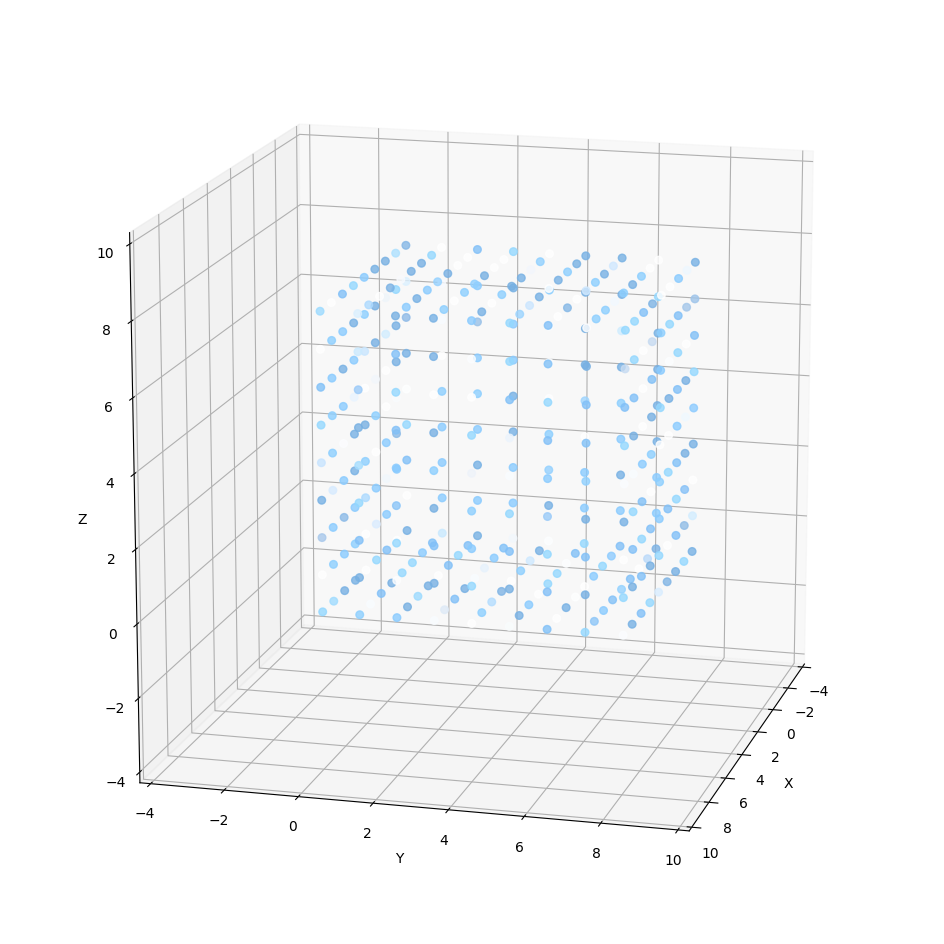

In [22]:
colors_seikika = b[:,3:6]


# Figureを追加
fig = plt.figure(figsize = (12, 12))
# 3DAxesを追加
ax = fig.add_subplot(projection='3d')
# Axesのタイトルを設定
ax.set_title("", size = 20)
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.set_xlim(-4,10)
ax.set_ylim(-4,10)
ax.set_zlim(-4,10)
ax.scatter(b[:,0], b[:,1], b[:,2], s = 30, c = colors_seikika, alpha = 0.8)
ax.view_init(elev=15, azim=15)
ax.set_aspect('equal')
ax.axis("on")
plt.show()

In [23]:
#位置情報の送信

#8*8*8の球を用意
#経路作成(C++)(8*8*8なのでpythonでやってもいいかも、将来的にC++にすればよい)    
#差分作成
#差分をもとに送信コードを作成(メイン)

In [24]:
#座標色情報をソート
import numpy as np

# 各行を数値に変換する関数を定義します
def combine(row):
    return row[0]*100 + row[1]*10 + row[2]
# 各行を数値に変換し、その結果に基づいてインデックスをソートします
indices = np.argsort(np.apply_along_axis(combine, 1, b))
# ソートされたインデックスを用いて行をソートします
b_sorted = b[indices]
print(b_sorted)


[[0.         0.         0.         0.46666667 0.69411767 0.89411765
  1.        ]
 [0.         0.         1.         1.         1.         1.
  1.        ]
 [0.         0.         2.         0.50980395 0.75294119 0.96862745
  1.        ]
 [0.         0.         3.         0.58039218 0.84705883 1.
  1.        ]
 [0.         0.         4.         0.99607843 1.         1.
  1.        ]
 [0.         0.         5.         0.47058824 0.69411767 0.89411765
  1.        ]
 [0.         0.         6.         0.55686277 0.72941178 0.90588236
  1.        ]
 [0.         0.         7.         0.86274511 0.94509804 1.
  1.        ]
 [0.         0.         8.         0.52156866 0.71764708 0.90196079
  1.        ]
 [0.         1.         0.         0.78823531 0.9137255  1.
  1.        ]
 [0.         1.         1.         0.5411765  0.79607844 1.
  1.        ]
 [0.         1.         2.         0.5411765  0.79607844 1.
  1.        ]
 [0.         1.         3.         0.5411765  0.79607844 1.
  1.        

In [25]:
#座標の差分を取得
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import time


# 二点間の距離を計算する関数
def distance(p1, p2):
    #return np.sqrt(np.sum((p1 - p2) ** 2))
    return np.max(np.abs(p1 - p2))

def greedy_path(coordinates, s):
    unvisited = set(range(len(coordinates)))
    current = 0
    path = [current]
    unvisited.remove(current)
    
    while unvisited:
        min_distance = float('inf')
        nearest_neighbor = None
        for neighbor in unvisited:
            dist = distance(coordinates[current], coordinates[neighbor])
            if dist <= s:
                nearest_neighbor = neighbor
                break
            elif dist < min_distance:
                min_distance = dist
                nearest_neighbor = neighbor
                
        current = nearest_neighbor
        path.append(current)
        unvisited.remove(current)
        #print(path)
    return path

# グラフ上の経路をプロットする関数
def plot_path(path, coordinates):
    fig = plt.figure(figsize=(15, 15))
    ax = fig.add_subplot(111, projection='3d')

    # 頂点をプロット
    xs, ys, zs = coordinates[:, 0], coordinates[:, 1], coordinates[:, 2]
    ax.scatter(xs, ys, zs, s = 0.1)

     # 経路をプロット
    n = len(path) - 1
    cmap = plt.cm.get_cmap("viridis") # カラーマップを選択

    for i in range(n):
        color = cmap(i / n) # 現在の経路に応じて色を変更
        ax.plot([coordinates[path[i]][0], coordinates[path[i + 1]][0]],
                [coordinates[path[i]][1], coordinates[path[i + 1]][1]],
                [coordinates[path[i]][2], coordinates[path[i + 1]][2]], color=color, alpha=0.6)

    # グラフを表示
    plt.show()

# 隣り合う二点間の距離を計算する関数
def adjacent_distances(path, coordinates):
    distances = []
    for i in range(len(path) - 1):
        distances.append(distance(coordinates[path[i]], coordinates[path[i + 1]]))
    return distances

# ヒストグラムをプロットする関数
def plot_histogram(distances):
    plt.hist(distances, bins=np.arange(min(distances), max(distances) + 1))
    plt.xlabel('Distance')
    plt.ylabel('Frequency')
    plt.title('Histogram of adjacent distances in the shortest path')
    plt.show()

s = 1
n = 10

# 座標データを生成
coordinates = b_sorted[:,0:3]
print(coordinates)
# 貪欲法で最短経路を求める
start_time = time.time()  # 時間計測開始
path = greedy_path(coordinates,s)
print(path)
# 経路をプロット
#plot_path(path, coordinates)

# 座標データをNumPy配列として出力
output_coordinates = np.array([b_sorted[index] for index in path])
print(output_coordinates) #これをもとに色は送信する(0-255で正規化をする)
#これで、色含めた点群情報を経路順にソートすることができた

virtex_before = output_coordinates[0:output_coordinates.shape[0]-1,0:3]
virtex_after = output_coordinates[1:output_coordinates.shape[0],0:3]
diff = virtex_after - virtex_before
print(diff)

#DCT 乗算ができるので、ちょっと精度をあげましたってことで、DCTを改善する
#今のDCTの論文をもう一度確認する


[[0. 0. 0.]
 [0. 0. 1.]
 [0. 0. 2.]
 [0. 0. 3.]
 [0. 0. 4.]
 [0. 0. 5.]
 [0. 0. 6.]
 [0. 0. 7.]
 [0. 0. 8.]
 [0. 1. 0.]
 [0. 1. 1.]
 [0. 1. 2.]
 [0. 1. 3.]
 [0. 1. 4.]
 [0. 1. 5.]
 [0. 1. 6.]
 [0. 1. 7.]
 [0. 1. 8.]
 [0. 2. 0.]
 [0. 2. 1.]
 [0. 2. 2.]
 [0. 2. 3.]
 [0. 2. 4.]
 [0. 2. 5.]
 [0. 2. 6.]
 [0. 2. 7.]
 [0. 2. 8.]
 [0. 3. 0.]
 [0. 3. 1.]
 [0. 3. 2.]
 [0. 3. 3.]
 [0. 3. 4.]
 [0. 3. 5.]
 [0. 3. 6.]
 [0. 3. 7.]
 [0. 3. 8.]
 [0. 4. 0.]
 [0. 4. 1.]
 [0. 4. 2.]
 [0. 4. 3.]
 [0. 4. 4.]
 [0. 4. 5.]
 [0. 4. 6.]
 [0. 4. 7.]
 [0. 4. 8.]
 [0. 5. 0.]
 [0. 5. 1.]
 [0. 5. 2.]
 [0. 5. 3.]
 [0. 5. 4.]
 [0. 5. 5.]
 [0. 5. 6.]
 [0. 5. 7.]
 [0. 5. 8.]
 [0. 6. 0.]
 [0. 6. 1.]
 [0. 6. 2.]
 [0. 6. 3.]
 [0. 6. 4.]
 [0. 6. 5.]
 [0. 6. 6.]
 [0. 6. 7.]
 [0. 6. 8.]
 [0. 7. 0.]
 [0. 7. 1.]
 [0. 7. 2.]
 [0. 7. 3.]
 [0. 7. 4.]
 [0. 7. 5.]
 [0. 7. 6.]
 [0. 7. 7.]
 [0. 7. 8.]
 [0. 8. 0.]
 [0. 8. 1.]
 [0. 8. 2.]
 [0. 8. 3.]
 [0. 8. 4.]
 [0. 8. 5.]
 [0. 8. 6.]
 [0. 8. 7.]
 [0. 8. 8.]
 [1. 0. 0.]
 [1. 0. 1.]
 [1.

In [31]:
#差分から送信命令を作る
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

code_virtex = np.empty((diff.shape[0]), dtype=np.int32)

diff = diff.astype(np.int32)
import numpy as np

for i in range(diff.shape[0]):
    if np.array_equal(diff[i], [-1, -1, -1]):
        code_virtex[i] = 1
    elif np.array_equal(diff[i], [-1, -1, 0]):
        code_virtex[i] = 2
    elif np.array_equal(diff[i], [-1, -1, 1]):
        code_virtex[i] = 3
    elif np.array_equal(diff[i], [-1, 0, -1]):
        code_virtex[i] = 4
    elif np.array_equal(diff[i], [-1, 0, 0]):
        code_virtex[i] = 5
    elif np.array_equal(diff[i], [-1, 0, 1]):
        code_virtex[i] = 6
    elif np.array_equal(diff[i], [-1, 1, -1]):
        code_virtex[i] = 7
    elif np.array_equal(diff[i], [-1, 1, 0]):
        code_virtex[i] = 8
    elif np.array_equal(diff[i], [-1, 1, 1]):
        code_virtex[i] = 9
    elif np.array_equal(diff[i], [0, -1, -1]):
        code_virtex[i] = 10
    elif np.array_equal(diff[i], [0, -1, 0]):
        code_virtex[i] = 11
    elif np.array_equal(diff[i], [0, -1, 1]):
        code_virtex[i] = 12
    elif np.array_equal(diff[i], [0, 0, -1]):
        code_virtex[i] = 13
    elif np.array_equal(diff[i], [0, 0, 0]):
        code_virtex[i] = 14
    elif np.array_equal(diff[i], [0, 0, 1]):
        code_virtex[i] = 15
    elif np.array_equal(diff[i], [0, 1, -1]):
        code_virtex[i] = 16
    elif np.array_equal(diff[i], [0, 1, 0]):
        code_virtex[i] = 17
    elif np.array_equal(diff[i], [0, 1, 1]):
        code_virtex[i] = 18
    elif np.array_equal(diff[i], [1, -1, -1]):
        code_virtex[i] = 19
    elif np.array_equal(diff[i], [1, -1, 0]):
        code_virtex[i] = 20
    elif np.array_equal(diff[i], [1, -1, 1]):
        code_virtex[i] = 21
    elif np.array_equal(diff[i], [1, 0, -1]):
        code_virtex[i] = 22
    elif np.array_equal(diff[i], [1, 0, 0]):
        code_virtex[i] = 23
    elif np.array_equal(diff[i], [1, 0, 1]):
        code_virtex[i] = 24
    elif np.array_equal(diff[i], [1, 1, -1]):
        code_virtex[i] = 25
    elif np.array_equal(diff[i], [1, 1, 0]):
        code_virtex[i] = 26
    elif np.array_equal(diff[i], [1, 1, 1]):
        code_virtex[i] = 27
    else: 
        code_virtex[i] = 28#あとでこのあとに座標を挿入する
        #ここでやった方がいいかも　
        #27のあとの3つの数字はそれぞれxyz座標を表している
        code_virtex = np.insert(code_virtex, i+1, virtex_after[i])
code_virtex = np.insert(code_virtex, 0, virtex_before[0])   
code_virtex = np.insert(code_virtex, code_virtex.shape, 29)
code_virtex = np.insert(code_virtex, 0, 0)
print(code_virtex)


#0つ目は同期用信号
#一つ目は絶対値に
#ifで
#該当しない場合は、該当なしコードから絶対値を取得、コードに




[ 0  0  0  0 15 15 15 15 15 15 15 15 16 13 13 13 13 13 13 13 17 15 15 15
 15 15 15 15 12 17 16 13 13 13 13 13 13 13 17 15 15 15 15 15 15 15 12 17
 16 13 13 13 13 13 13 13 17 15 15 15 15 15 15 15 12 17 16 13 13 13 13 13
 13 13 17 15 15 15 15 15 15 15 12 17 20 11 11 11 11 11 11 10 13 13 13 13
 13 13 13 17 17 17 17 17 17 17 17 15 15 15 15 15 15 15 15 20 11 11 11 11
 11 11  2 22 13 13 13 13 13 13 13 17 17 17 17 17 17 17 17 15 15 15 15 15
 15 15 15 20 11 11 11 11 11 11  2 22 13 13 13 13 13 13 13 17 17 17 17 17
 17 17 17 15 15 15 15 15 15 15 15 20 11 11 11 11 11 11  2 22 13 13 13 13
 13 13 13 17 17 17 17 17 17 17 17 15 15 15 15 15 15 15 15 20 11 11 11 11
 11 11  2 22 13 13 13 13 13 13 13 17 17 17 17 17 17 17 17 15 15 15 15 15
 15 15 15 20 11 11 11 11 11 11  2 22 13 13 13 13 13 13 13 17 17 17 17 17
 17 17 17 15 15 15 15 15 15 15 15 20 11 11 11 11 11 11  2 22 13 13 13 13
 13 13 13 17 17 17 17 17 17 17 17 15 15 15 15 15 15 15 15 19 10 10 10 10
 10 10 10 15 15 15 15 15 15 15  6 23 16 13 13 13 13

In [83]:
import numpy as np
np.set_printoptions(threshold=np.inf)
# 命令をバイナリ列に変換
#座標送信時とDIFF送信時で、7ビット5ビットでビット数が変わる

to_binary_7bit = np.vectorize(lambda x: np.binary_repr(x, width=7))
to_binary_5bit = np.vectorize(lambda x: np.binary_repr(x, width=5))

binary_arr = np.copy(code_virtex)

def convert_to_binary(code_virtex):
    k = 0
    binary_arr = to_binary_7bit(code_virtex)
    while(k < code_virtex.shape[0]):
        if (code_virtex[k] == 28 or k == 0):
            binary_arr[k] = to_binary_5bit(code_virtex[k])
            k += 4
        else:
            binary_arr[k] = to_binary_5bit(code_virtex[k])
            k += 1
    print(binary_arr)

    # 各要素の2進数表現を連結して1つの配列にする
    code_virtex_binary = np.array([int(digit) for binary in binary_arr for digit in binary])
    
    return code_virtex_binary

# 2進数に変換して結果を取得
code_virtex_binary = convert_to_binary(code_virtex)

# 結果の出力
print(code_virtex_binary)

#2進数を10進数に変換する関数
def binary_to_decimal(binary_array):
    decimal = 0
    power = len(binary_array) - 1
    for bit in binary_array:
        decimal += bit * (2 ** power)
        power -= 1
    return decimal


['00000' '0000000' '0000000' '0000000' '01111' '01111' '01111' '01111'
 '01111' '01111' '01111' '01111' '10000' '01101' '01101' '01101' '01101'
 '01101' '01101' '01101' '10001' '01111' '01111' '01111' '01111' '01111'
 '01111' '01111' '01100' '10001' '10000' '01101' '01101' '01101' '01101'
 '01101' '01101' '01101' '10001' '01111' '01111' '01111' '01111' '01111'
 '01111' '01111' '01100' '10001' '10000' '01101' '01101' '01101' '01101'
 '01101' '01101' '01101' '10001' '01111' '01111' '01111' '01111' '01111'
 '01111' '01111' '01100' '10001' '10000' '01101' '01101' '01101' '01101'
 '01101' '01101' '01101' '10001' '01111' '01111' '01111' '01111' '01111'
 '01111' '01111' '01100' '10001' '10100' '01011' '01011' '01011' '01011'
 '01011' '01011' '01010' '01101' '01101' '01101' '01101' '01101' '01101'
 '01101' '10001' '10001' '10001' '10001' '10001' '10001' '10001' '10001'
 '01111' '01111' '01111' '01111' '01111' '01111' '01111' '01111' '10100'
 '01011' '01011' '01011' '01011' '01011' '01011' '000

In [98]:
#位置情報の受信
#状態遷移図を書く
import pandas as pd
np.set_printoptions(threshold=np.inf)
#差分の受信
zyushin = 0
i = 0
zettai = 0
count = 0
bangou = 0

mybangou = 0

#この発光デバイスのID
code_X = 8
code_Y = 8
code_X = 8
#これと一致した場合に、番号を保存し、色情報を受け取る

code_zyushin_diff = np.empty((5,))
code_zyushin_zahyou = np.empty((7,))
code_zyushin_sync = np.array([1,1,1,1,1])
code_zyushin = np.array([])
code_zyushin_XYZ = np.zeros((3,))
code_zyushin_debugX = np.array([])
code_zyushin_debugY = np.array([])
code_zyushin_debugZ = np.array([])  #ここにはXYZを順に入れてデバッグ用に
code_zyushin_debug = np.array([])  #受信をそのまま入れて、デバッグ用に

#同期の確認のために最初に変な信号を入れる
#受信まち(0を連続で5個受信で受信開始)(同期をとる)
while zyushin == 0:
    code_zyushin_1bit = code_virtex_binary[i]
    code_zyushin_sync = np.roll(code_zyushin_sync, 1)
    code_zyushin_sync[0] = code_zyushin_1bit
    if np.all(code_zyushin_sync == 0):
        zyushin = 1
    i += 1

print(i)
#受信(最初の絶対座標の受信)
for j in range(3):
    for k in range(7):
        code_zyushin_1bit = code_virtex_binary[i]
        code_zyushin_zahyou = np.roll(code_zyushin_zahyou, 1)
        code_zyushin_zahyou[0] = code_zyushin_1bit
        #7ビットの数字を10進数にしてcode_zyushinに保存していく（これはずっと同じ）
        i += 1
    if j == 0 : code_zyushin_XYZ[j] += binary_to_decimal(code_zyushin_zahyou).astype(np.int32)

print(code_zyushin_XYZ)
print(i)

#受信
while zyushin == 1:
    #絶対値のとき
    if zettai == 1:
        for k in range(7):
            code_zyushin_1bit = code_virtex_binary[i]
            code_zyushin_zahyou = np.roll(code_zyushin_sync, 1)
            code_zyushin_zahyou[0] = code_zyushin_1bit
            code_zyushin_XYZ[count] = binary_to_decimal(code_zyushin_zahyou).astype(np.int32)
            i += 1
        count += 1
        if count == 2:
            count = 0
            zettai = 0

    #差分のとき
    else:
        for k in range(5):
            code_zyushin_1bit = code_virtex_binary[i]
            code_zyushin_diff = np.roll(code_zyushin_diff, 1)
            code_zyushin_diff[0] = code_zyushin_1bit
            code_diff_10 = binary_to_decimal(code_zyushin_diff).astype(np.int32)
            i += 1
        if code_diff_10 == 29:
            zyushin = 0
            break
        elif code_diff_10 == 28:
            zettai = 1
        code_zyushin_XYZ += binary_to_decimal(code_zyushin_diff).astype(np.int32)
        print(code_zyushin_XYZ)
        

        #diffに6ビット使った方が計算が楽かも
        #if文を30回近く回すのはあまりよろしくないかもしれない
        #受信信号の数字のインデックスをもつ配列の要素を抜き出してこればよい？
        #データシート読んで考える、わからなければ聞く
        #6bit使う方が、純粋にその値を加算減算すればよいので、現実的かも


"""
    elif code_zyushin == 29:
        zyushin = 0
    elif code_zyushin == 28:
        zettai = 1
        diff_zyushin = np.append(diff_zyushin, code_zyushin)
    elif code_zyushin >= 1 | code_zyushin <= 27:
        diff_zyushin = np.append(diff_zyushin, code_zyushin)
    i += 1"""

#print(diff_zyushin)


#差分から位置情報復元(メイン)
#番号を加算していく
#表示

#ここまで今週にやる

#色は来週やる

#日曜日TODO

#受信で必要な計算時間は、8*8*8のIDCT時間

#ある程度できたら、バイナリの1列を送信して、バイナリの1列を受信するようにする
#受信したバイナリから、もとの10進のデータを復号する
#途中です、でいい
#メイン進捗は、任意の3D像から、色付き点群データを生成できるようになった


5
[0. 0. 0.]
26
[30. 30. 30.]
[60. 60. 60.]
[90. 90. 90.]
[120. 120. 120.]
[150. 150. 150.]
[180. 180. 180.]
[210. 210. 210.]
[240. 240. 240.]
[241. 241. 241.]
[263. 263. 263.]
[285. 285. 285.]
[307. 307. 307.]
[329. 329. 329.]
[351. 351. 351.]
[373. 373. 373.]
[395. 395. 395.]
[412. 412. 412.]
[442. 442. 442.]
[472. 472. 472.]
[502. 502. 502.]
[532. 532. 532.]
[562. 562. 562.]
[592. 592. 592.]
[622. 622. 622.]
[628. 628. 628.]
[645. 645. 645.]
[646. 646. 646.]
[668. 668. 668.]
[690. 690. 690.]
[712. 712. 712.]
[734. 734. 734.]
[756. 756. 756.]
[778. 778. 778.]
[800. 800. 800.]
[817. 817. 817.]
[847. 847. 847.]
[877. 877. 877.]
[907. 907. 907.]
[937. 937. 937.]
[967. 967. 967.]
[997. 997. 997.]
[1027. 1027. 1027.]
[1033. 1033. 1033.]
[1050. 1050. 1050.]
[1051. 1051. 1051.]
[1073. 1073. 1073.]
[1095. 1095. 1095.]
[1117. 1117. 1117.]
[1139. 1139. 1139.]
[1161. 1161. 1161.]
[1183. 1183. 1183.]
[1205. 1205. 1205.]
[1222. 1222. 1222.]
[1252. 1252. 1252.]
[1282. 1282. 1282.]
[1312. 1312. 131

'\n    elif code_zyushin == 29:\n        zyushin = 0\n    elif code_zyushin == 28:\n        zettai = 1\n        diff_zyushin = np.append(diff_zyushin, code_zyushin)\n    elif code_zyushin >= 1 | code_zyushin <= 27:\n        diff_zyushin = np.append(diff_zyushin, code_zyushin)\n    i += 1'

In [5]:
#量子化テーブルの作成
import numpy as np

bairitu = 1
dc = 50

tableY = np.zeros((8,8))
ryoshi_Y = np.array([[dc,  11,  10,  16,  24,  40,  51,  61 ],
[ 12,  12,  14,  19,  26,  58,  60,  55 ],
[ 14,  13,  16,  24,  40,  57,  69,  56 ],
[ 14,  17,  22,  29,  51,  87,  80,  62 ],
[ 18,  22,  37,  56,  68, 109, 103,  77 ],
[ 24,  35,  55,  64,  81, 104, 113,  92 ],
[ 49,  64,  78,  87, 103, 121, 120, 101 ],
[ 72,  92,  95,  98, 112, 100, 103,  99 ]])

tableY = (ryoshi_Y*bairitu).astype(np.int32)
tableY[tableY < 1] = 1
print(tableY)

tableC = np.zeros((8,8))
ryoshi_C = np.array([[dc,  18,  24,  47,  99,  99,  99 , 99 ],
[ 18,  21,  26,  66,  99,  99,  99,  99 ],
[ 24,  26,  56,  99,  99,  99,  99,  99 ],
[ 47,  66,  99,  99,  99,  99,  99,  99 ],
[ 99,  99,  99,  99,  99,  99,  99,  99 ],
[ 99,  99,  99,  99,  99,  99,  99,  99 ],
[ 99,  99,  99,  99,  99,  99,  99,  99 ],
[ 99,  99,  99,  99,  99,  99,  99,  99 ]])


tableC = (ryoshi_C*bairitu).astype(np.int32)
tableC[tableC<1] =1
print(tableC)

[[ 50  11  10  16  24  40  51  61]
 [ 12  12  14  19  26  58  60  55]
 [ 14  13  16  24  40  57  69  56]
 [ 14  17  22  29  51  87  80  62]
 [ 18  22  37  56  68 109 103  77]
 [ 24  35  55  64  81 104 113  92]
 [ 49  64  78  87 103 121 120 101]
 [ 72  92  95  98 112 100 103  99]]
[[50 18 24 47 99 99 99 99]
 [18 21 26 66 99 99 99 99]
 [24 26 56 99 99 99 99 99]
 [47 66 99 99 99 99 99 99]
 [99 99 99 99 99 99 99 99]
 [99 99 99 99 99 99 99 99]
 [99 99 99 99 99 99 99 99]
 [99 99 99 99 99 99 99 99]]


In [40]:
#DCTIDCT

import numpy as np
import matplotlib.pyplot as plt

#コサイン定数の定義
"""
C13 = -0.831469612
C9 = -0.195090322
C5 = 0.555570233
"""
C13 = -1
C9 = -0.25
C5 = 0.5
#シフト演算のみでできるように
#課題：ハードウェアでやる場合の誤差伝搬をどう少なくするか

C5_inv = 1/C5
C9_inv = 1/C9
C13_inv = 1/C13

X_out1 = np.zeros((8,8,8))
X_out2 = np.zeros((8,8,8))
X_out3 = np.zeros((8,8,8))
x_in2 = np.zeros((8,8,8))
x_in3 = np.zeros((8,8,8))
x_in3i = np.zeros((8,8,8))
x_in2i = np.zeros((8,8,8))
x_in1i = np.zeros((8,8,8))
X_out1i = np.zeros((8,8,8))
X_out2i = np.zeros((8,8,8))

def butterfly_1(x):
    X = np.zeros(8)
    X[0] = x[0] + x[1]
    X[1] = x[2] + x[3]
    X[2] = x[0] - x[1]
    X[3] = x[2] - x[3]
    X[4] = x[4] + x[5]
    X[5] = x[6] + x[7]
    X[6] = x[4] - x[5]
    X[7] = x[6] - x[7]
    return X

def butterfly_2(x):
    X = np.zeros(8)
    X[0] = x[0] + x[1]
    X[1] = x[4] + x[5]
    X[2] = x[2] + x[3]
    X[3] = x[6] + x[7]
    X[4] = x[0] - x[1]
    X[5] = x[4] - x[5]
    X[6] = x[2] - x[3]
    X[7] = x[6] - x[7]
    return X

def butterfly_3(x):
    X = np.zeros(8)
    X[0] = x[0] + x[1]
    X[1] = x[0] - x[1]
    X[2] = x[2] + x[3]
    X[3] = x[2] - x[3]
    X[4] = x[4] + x[5]
    X[5] = x[4] - x[5]
    X[6] = x[6] + x[7]
    X[7] = x[6] - x[7]
    return X

def cosine(x):
    X = np.zeros(8)
    X[0] = x[0]
    X[1] = x[1]*C13
    X[2] = x[2]*C9
    X[3] = x[3]*C9*C13
    X[4] = x[4]*C5
    X[5] = x[5]*C13*C5
    X[6] = x[6]*C9*C5
    X[7] = x[7]*C13*C9*C5
    return X

def Ibutterfly_1(X):
    x = np.zeros(8).astype(np.int32)
    x[0] = 0.5*X[0] + 0.5*X[2]
    x[1] = 0.5*X[0] - 0.5*X[2]
    x[2] = 0.5*X[1] + 0.5*X[3]
    x[3] = 0.5*X[1] - 0.5*X[3]
    x[4] = 0.5*X[4] + 0.5*X[6]
    x[5] = 0.5*X[4] - 0.5*X[6]
    x[6] = 0.5*X[5] + 0.5*X[7]
    x[7] = 0.5*X[5] - 0.5*X[7]
    return x

def Ibutterfly_2(X):
    x = np.zeros(8).astype(np.int32)
    x[0] = 0.5*X[0] + 0.5*X[4]
    x[1] = 0.5*X[0] - 0.5*X[4]
    x[2] = 0.5*X[2] + 0.5*X[6]
    x[3] = 0.5*X[2] - 0.5*X[6]
    x[4] = 0.5*X[1] + 0.5*X[5]
    x[5] = 0.5*X[1] - 0.5*X[5]
    x[6] = 0.5*X[3] + 0.5*X[7]
    x[7] = 0.5*X[3] - 0.5*X[7]
    return x

def Ibutterfly_3(X):
    x = np.zeros(8).astype(np.int32)
    x[0] = 0.5*X[0] + 0.5*X[1]
    x[1] = 0.5*X[0] - 0.5*X[1]
    x[2] = 0.5*X[2] + 0.5*X[3]
    x[3] = 0.5*X[2] - 0.5*X[3]
    x[4] = 0.5*X[4] + 0.5*X[5]
    x[5] = 0.5*X[4] - 0.5*X[5]
    x[6] = 0.5*X[6] + 0.5*X[7]
    x[7] = 0.5*X[6] - 0.5*X[7]
    return x

def inv_cosine(X):
    x = np.zeros(8).astype(np.int32)
    x[0] = X[0]
    x[1] = X[1] * C13_inv
    x[2] = X[2] * C9_inv
    x[3] = X[3] * (C9_inv * C13_inv)
    x[4] = X[4] * C5_inv
    x[5] = X[5] * (C5_inv * C13_inv)
    x[6] = X[6] * (C5_inv * C9_inv)
    x[7] = X[7] * (C5_inv * C9_inv * C13_inv)
    return x

def DCT1(x_in):
    X_1 = butterfly_1(x_in)
    X_2 = butterfly_2(X_1)
    X_3 = butterfly_3(X_2)
    X_out = cosine(X_3)
    return X_out

def IDCT1(X_out):
    X_3 = inv_cosine(X_out)
    X_2 = Ibutterfly_3(X_3)
    X_1 = Ibutterfly_2(X_2)
    x = Ibutterfly_1(X_1)
    return x

def DCT(x_in):
    for i in range(8):
        x = x_in[i]
        X_out = DCT1(x)
        x_in[i] = X_out
    return x_in
    
def IDCT(X_out):
    for i in range(8):
        X = X_out[i]
        x = IDCT1(X_out)
        X_out[i] = x
    return X_out


def tenchi2D(x):
    x = np.transpose(x)
    return x


def DCT_2D(x_in1, X_out1, x_in2, X_out2):
    # ｘ方向   
    for i in range(8):
        X_out1[i] = DCT1(x_in1[i])
    #転置
    x_in2 = tenchi2D(X_out1)
    #ｙ方向
    for i in range(8):
        X_out2[i] = DCT1(x_in2[i])
    return X_out2

    
def IDCT_2D(X_out2i, x_in2i, X_out1i, x_in1i, n):
    for i in range(8):
        x_in2i[i] = IDCT1(X_out2i[i])
    #転置
    X_out1i = tenchi2D(x_in2i).astype(np.int32)
    # ｘ方向
    """
    if n == 1:
        print(X_out1i)"""
    for i in range(8):
        x_in1i[i] = IDCT1(X_out1i[i])
    x_in1i = x_in1i.astype(np.int32)
    """if n == 1:
        print(x_in1i)"""
    return x_in1i

[[169 -64  -6  18  -8 -15   4  -2]
 [ -7  17  -6  -3  15  -2   0   0]
 [  2   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0]
 [ 11  -3   1   0  -2   0   0   0]
 [  4   6   0   1   0   0   0   0]
 [  0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0]]
[[151 -73  -3   1   5  -4   0   0]
 [ -1  10   6   0  -1   0   0   0]
 [  0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0]
 [  0  -1   0   0   0   0   0   0]
 [  1  -3   0   0   0   1   0   0]
 [  0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0]]
[[157  38   7   0   5   6   0   0]
 [ 10   8   4  -1   0  -2   0   0]
 [ -1   0   0   0   0   0   0   0]
 [ -1   0   0   0   0   0   0   0]
 [ -1   0   0   0   1   0   0   0]
 [  0  -1   0   0   0   1   0   0]
 [  0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0]]
最も多い要素数を持つ8x8配列のインデックス: 690
0でない要素の数: 23


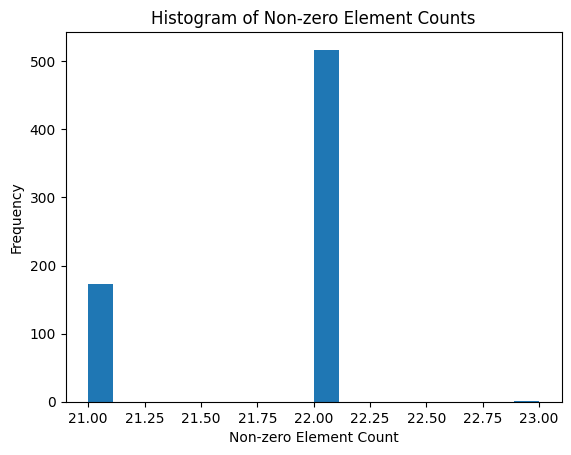

169.0
187.0
172.0


15030.0
9150.0
10189.0


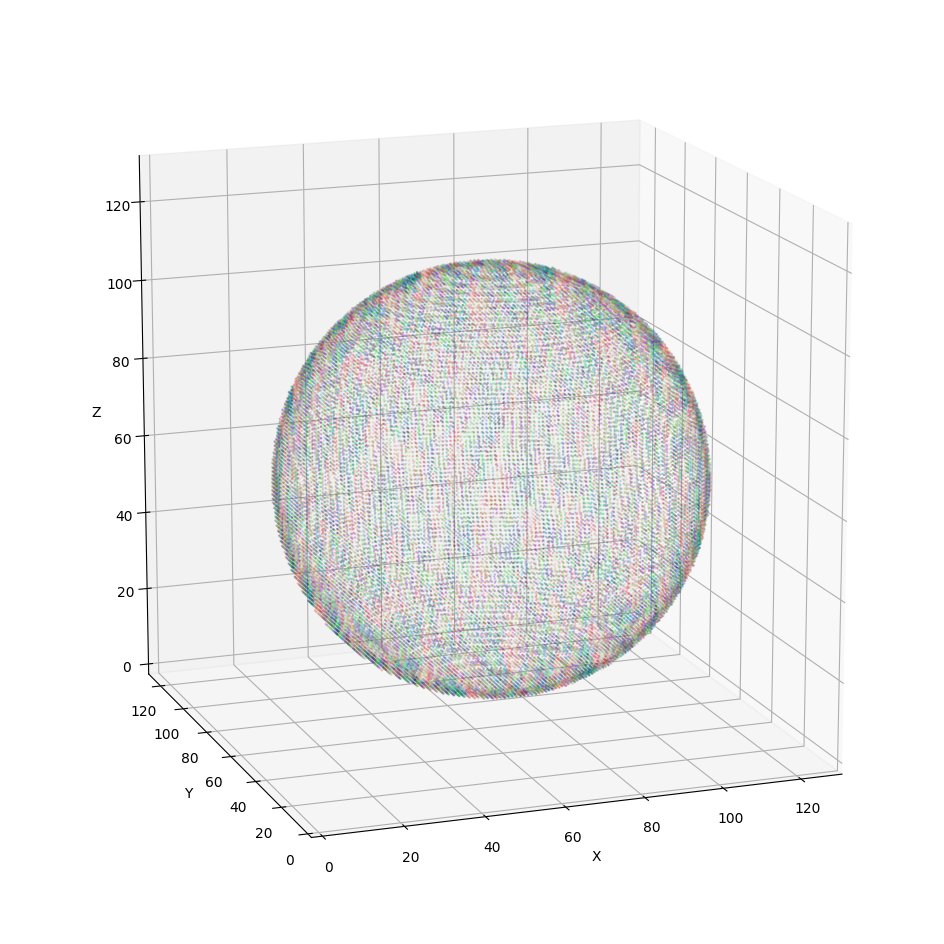

In [47]:
import numpy as np
import cv2

#8*8ずつ
X_out1 = np.zeros((8,8))
X_out2 = np.zeros((8,8))
x_in2 = np.zeros((8,8))
x_in2i = np.zeros((8,8))
x_in1i = np.zeros((8,8))
X_out1i = np.zeros((8,8))
X_out2i = np.zeros((8,8))
nonzeroY = np.array([])
saidaiY = np.array([])
nonzeroCr = np.array([])
saidaiCr = np.array([])
nonzeroCb = np.array([])
saidaiCb = np.array([])

#成分の入れ替え
colors_BGR = colors[:, ::-1]

#実験：小さい範囲に正規化する
#この場合量子化テーブルを小さくする必要がある
#正規化するのはRGBじゃなくてYCrCbのほうがいいかも
colors_BGR = colors_BGR

colors_add = np.zeros((64,3))
colors_BGR = np.concatenate([colors_BGR, colors_add], 0).astype(np.uint8)

#枚数を計算
maisu = dot//64 + 1

#発光デバイスを8*8ごとに分割
colors88 = np.zeros((maisu,8,8,3))
k = 0
for m in range(maisu):
    for i in range(8):
        for j in range(8):
            colors88[m,i,j] = colors_BGR[k]
            k = k + 1

#データ形式をuint8に変換
colors88 = colors88.astype(np.uint8)
"""cv2.namedWindow("Image1", cv2.WINDOW_NORMAL)
cv2.imshow("Image1", colors88[dot//64,:,:,:])
cv2.waitKey()"""

#色変換，要素ごとに分割、正規化
for i in range(maisu):
    colors88[i,:,:,:] = cv2.cvtColor(colors88[i,:,:,:], cv2.COLOR_BGR2YCrCb)
Y = colors88[:,:,:,0].astype(np.float16)
Cr = colors88[:,:,:,1].astype(np.float16)
Cb = colors88[:,:,:,2].astype(np.float16)

#変換，量子化
for i in range(maisu):
    Y[i,:,:] = DCT_2D(Y[i,:,:], X_out1, x_in2, X_out2)
    Cr[i,:,:] = DCT_2D(Cr[i,:,:], X_out1, x_in2, X_out2)
    Cb[i,:,:] = DCT_2D(Cb[i,:,:], X_out1, x_in2, X_out2)
    Y[i,:,:] = Y[i,:,:]/tableY
    Cr[i,:,:] = Cr[i,:,:]/tableC
    Cb[i,:,:] = Cb[i,:,:]/tableC
    Y[i,:,:] = Y[i,:,:].astype(np.int32)
    Cr[i,:,:] = Cr[i,:,:].astype(np.int32)
    Cb[i,:,:] = Cb[i,:,:].astype(np.int32)

    saidaiY = np.append(saidaiY, np.amax(Y[i,:,:]))
    saidaiCr = np.append(saidaiCr, np.amax(Cr[i,:,:]))
    saidaiCb = np.append(saidaiCb, np.amax(Cb[i,:,:]))

    nonzeroY = np.append(nonzeroY, (np.count_nonzero(Y[i,:,:])))
    nonzeroCr = np.append(nonzeroCr, (np.count_nonzero(Cr[i,:,:])))
    nonzeroCb = np.append(nonzeroCb, (np.count_nonzero(Cb[i,:,:])))

    #if i == 0:
        #print(Y[0,:,:])
        #print(saidaiY)
        #print(nonzeroY)


#ここからは整数しか使えない
Y = Y.astype(np.int32)
Cr = Cr.astype(np.int32)
Cb = Cb.astype(np.int32)

print(Y[1,:,:])
print(Cr[1,:,:])
print(Cb[1,:,:])

non_zero_counts = np.count_nonzero(Y, axis=(1, 2))
max_index = np.argmax(non_zero_counts)
max_non_zero_count = non_zero_counts[max_index]
print("最も多い要素数を持つ8x8配列のインデックス:", max_index)
print("0でない要素の数:", max_non_zero_count)
plt.hist(non_zero_counts, bins='auto')
plt.xlabel("Non-zero Element Count")
plt.ylabel("Frequency")
plt.title("Histogram of Non-zero Element Counts")
plt.show()

#復元
for i in range(maisu):
    Y[i,:,:] = Y[i,:,:]*tableY
    Cr[i,:,:] = Cr[i,:,:]*tableC
    Cb[i,:,:] = Cb[i,:,:]*tableC

for i in range(maisu):
    """if i == 1:
        print(Y[i,:,:])
        print(Cr[i,:,:])
        print(Cb[i,:,:])"""
    Y[i,:,:] = IDCT_2D(Y[i,:,:], X_out1, x_in2, X_out2, i)
    Cr[i,:,:] = IDCT_2D(Cr[i,:,:], X_out1, x_in2, X_out2, i)
    Cb[i,:,:] = IDCT_2D(Cb[i,:,:], X_out1, x_in2, X_out2, i)

Y_recrypt = Y.astype(np.uint8)
Cr_recrypt = Cr.astype(np.uint8)
Cb_recrypt = Cb.astype(np.uint8)

colors88_recrypt = np.stack([Y_recrypt, Cr_recrypt, Cb_recrypt],-1)

#BGRに変換(ここで乗算が必要になる)
for i in range(maisu):
    colors88_recrypt[i,:,:,:] = cv2.cvtColor(colors88_recrypt[i,:,:,:], cv2.COLOR_YCrCb2BGR)

#8*8から一列に
colors_BGR_recrypt = np.zeros((dot + 64,3))
k = 0
for m in range(maisu):
    for i in range(8):
        for j in range(8):
            colors_BGR_recrypt[k] = colors88_recrypt[m,i,j]
            k = k + 1

#表示できるように
colors_RGB_recrypt = colors_BGR_recrypt[:, ::-1]
colors_RGB_recrypt = colors_RGB_recrypt[0:dot, :]
colors_RGB_recrypt = colors_RGB_recrypt.astype(np.int32)
virtex = virtex.astype(np.int32)
virtex_colors_recrypt = np.concatenate([virtex, colors_RGB_recrypt], -1)
colors_recrypt = virtex_colors_recrypt[:,3:6]
colors_recrypt_seikika = colors_recrypt/255

print(np.max(saidaiY))
print(np.max(saidaiCr))
print(np.max(saidaiCb))
print("\n")
print(np.sum(nonzeroY))
print(np.sum(nonzeroCr))
print(np.sum(nonzeroCb))


#像の表示
fig = plt.figure(figsize = (12, 12))
ax = fig.add_subplot(projection='3d')
ax.set_title("", size = 20)
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.set_xlim(0,128)
ax.set_ylim(0,128)
ax.set_zlim(0,129)
ax.scatter(virtex_colors_recrypt[:,0], virtex_colors_recrypt[:,1], virtex_colors_recrypt[:,2], s = 0.5, c = colors_recrypt_seikika, alpha = 0.3)
ax.view_init(elev=15, azim=250)
ax.set_aspect('equal')
ax.axis("on")
plt.show()

#逆の操作をして元の配列に色を戻して表示する
#DCT量子化後の配列の０でない要素の値の数を調べる

In [28]:
import numpy as np

array = np.random.randint(0, 10, size=(10, 8, 8))  # 10枚の8x8配列を作成（ランダムな要素で初期化する場合）
array[0,:,:] = 1
print(array[0,:,:])

non_zero_counts = np.count_nonzero(array, axis=(1, 2))
max_index = np.argmax(non_zero_counts)
max_non_zero_count = non_zero_counts[max_index]

print("最も多い要素数を持つ8x8配列のインデックス:", max_index)
print("0でない要素の数:", max_non_zero_count)

[[1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1]]
最も多い要素数を持つ8x8配列のインデックス: 0
0でない要素の数: 64
